# Clustering 

Clustering is a machine learning task in which data is categorized into groups where items in each group are similar. 

In below figures, we can see the clusters of handwritten digits. Figure 1 (a) shows the single cluster of handwritten digit 8 and Figure 1 (b) shows the clusters of handwritten digits 0 - 9. 

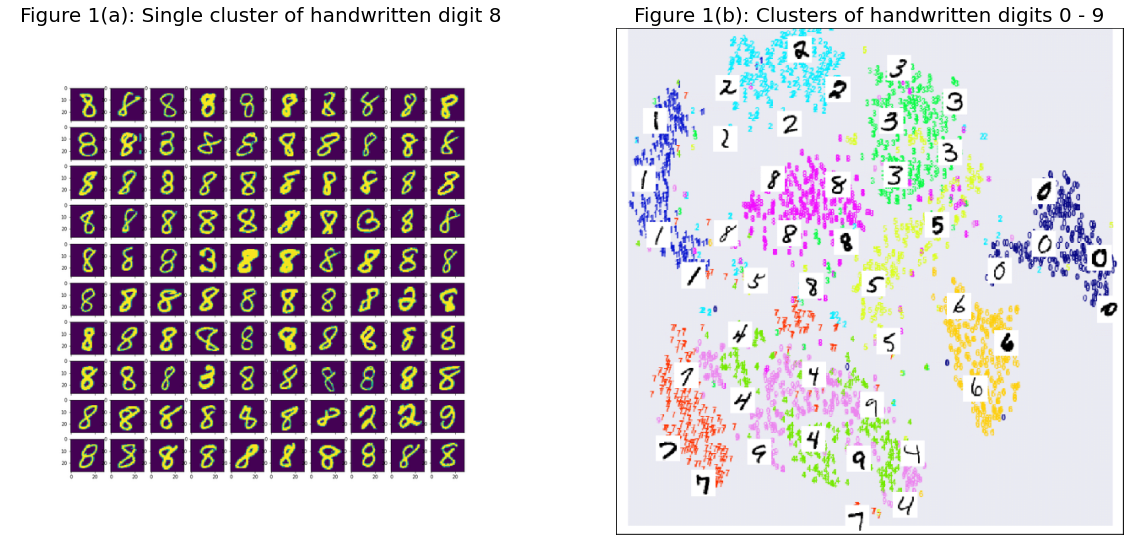

In [49]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from PIL import Image

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 20,20

# read images
img_A = Image.open('../assets/mnist_8.png')
img_B = Image.open('../assets/mnist_all.png') 
img_B = img_B.resize(img_A.size)
# display images
fig, ax = plt.subplots(1,2)


ax[0].imshow(img_A);
ax[0].axis('off')
ax[0].set_title("Figure 1(a): Single cluster of handwritten digit 8", fontsize = 20)
ax[1].imshow(img_B);
ax[1].axis('off')
a = ax[1].set_title("Figure 1(b): Clusters of handwritten digits 0 - 9", fontsize = 20)


# Activity 1

Question 1 - In Figure 1 (a), Why are there images corresponding to digit '3' are part of cluster '8'?


Question 2 - In Figure 1 (b), Why distance between clusters of 4 and 7 is less than disance between cluster of 7 and 0?





# World Happiness Dataset


World happiness dataset consists of dataset of 155 countries which are ranked by their happiness levels. The scores are based on answers to the main life evaluation question asked in a poll. The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. These scores explain why some countries rank higher than others. 


In this lesson, we will do following tasks
- Load World Happiness Data. 
- Observe the available columns and their data types.
- Visualize the dataset to understand how different countries rank w.r.t. each other.
- Learn about K-Means clustering algorithm which is used to cluster data into similar groups. 
- Use K-Means Clustering to form the clusters of countries with high, medium and low happiness scores. 



In [56]:
# Load World Happiness Data
import pandas as pd
df = pd.read_csv("../assets/happiness2019dataset/2015.csv")


In [64]:
# View first five rows of the dataset
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [61]:
# Observe the statistics of Columns
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [63]:
# Observe the data types of columns
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

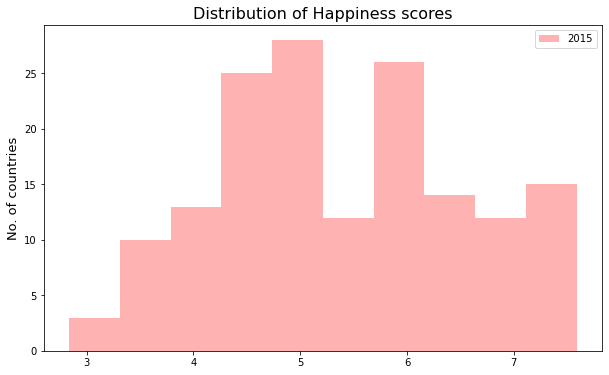

In [68]:
# Visualize the distribution of the happiness scores
plt.figure(figsize=(10,6))
a=10
plt.hist(df["Happiness Score"],a,label='2015',alpha=0.3,color='red')
plt.ylabel('No. of countries',size=13)
plt.legend(loc='upper right')
a = plt.title("Distribution of Happiness scores",size=16)


# Questions related to distribution of the happiness score 

Question 1 - How many countries have happiness score of 7?
- Less than 5
- Less than 15
- 10 - 15
- Greater than 20

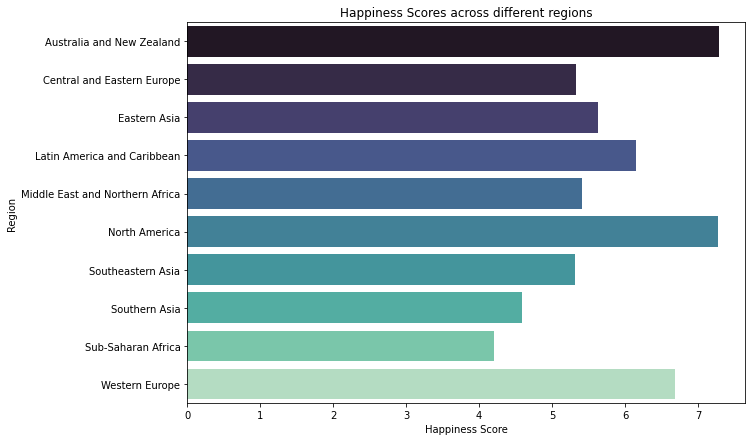

In [78]:
reg = pd.DataFrame(df.groupby(['Region'])["Happiness Score"].mean())
plt.figure(figsize=(10,7))
plt.title('Happiness Scores across different regions')
sns.barplot(x='Happiness Score',y=reg.index,data=reg,palette='mako')

# Questions related to happiness score across different regions 

Question 1 - Which region has highest score?
- Western Europe
- Southern Asia
- North America
- Middle East and Northern Africa

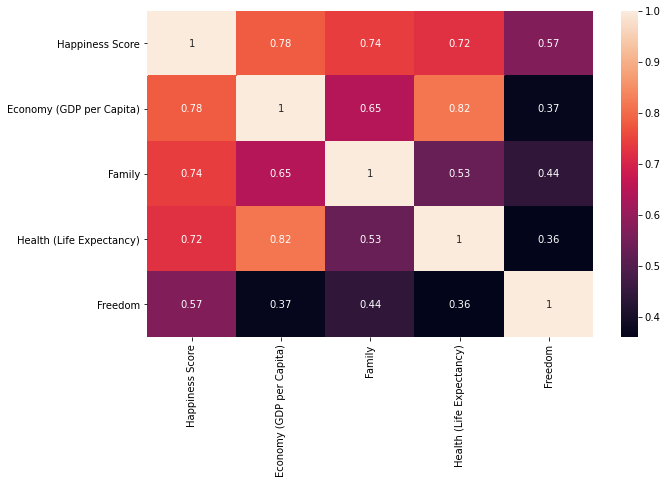

In [74]:
# Correlation between happiness score and economy, family, health. 
import seaborn as sns
df_copy = df.copy()
df_copy.drop(['Country', 'Region', 'Happiness Rank', 'Standard Error', 'Generosity', 'Dystopia Residual', 'Trust (Government Corruption)'], axis=1,inplace=True)
c2 = df_copy.corr(method = "pearson")
plt.figure(figsize=(10,6))
sns.heatmap(c2,annot=True)

# Questions related to distribution of the happiness score 

Question 1 - Which factor is a good predictor for happiness score?
- Economy(GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom

In [81]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [134]:
# K-Means Clustering
from sklearn.preprocessing import StandardScaler
clustering_data = df[["Happiness Score", 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]
ss = StandardScaler()
ss.fit_transform(clustering_data)



array([[ 1.93736005,  1.36962124,  1.32028142, ...,  2.30965159,
         0.47103971,  0.75825809],
       [ 1.91458063,  1.13522625,  1.51445776, ..., -0.01647953,
         1.57585637,  1.09285682],
       [ 1.88479215,  1.19286069,  1.36105403, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [-2.0761992 , -0.45524543, -1.90108634, ...,  0.38141902,
         1.85689094, -3.20843049],
       [-2.1646885 , -2.06756644, -2.1184666 , ..., -0.35771452,
        -0.31694987, -0.48198451],
       [-2.22251319, -1.58633379, -3.13472485, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [135]:
# K-Means Clustering on World Happiness Data 
from sklearn.cluster import KMeans
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(clustering_data, 3)
kmeans = pd.DataFrame(clust_labels)
clustering_data.insert((clustering_data.shape[1]),'kmeans',kmeans)

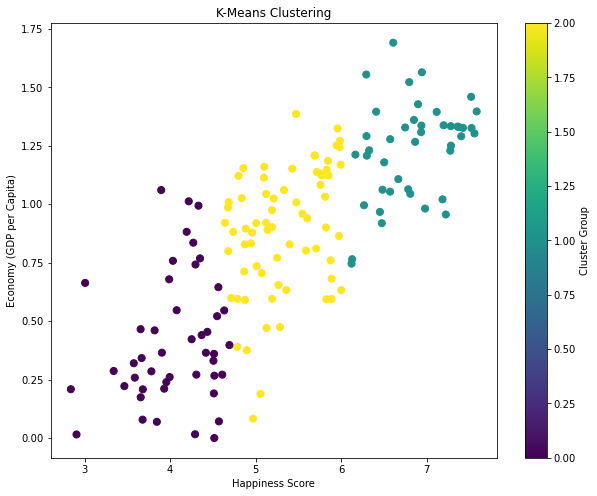

In [136]:

#Plot the clusters obtained using k means
fig = plt.figure(figsize= (10,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(clustering_data['Happiness Score'],clustering_data['Economy (GDP per Capita)'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Happiness Score')
ax.set_ylabel('Economy (GDP per Capita)')
cbar = plt.colorbar(scatter)
cbar.set_label("Cluster Group")

# Questions related to Clustering

Question 1: Which cluster represents high happiness score?  1, 2 or 3

# Activity 
Change number of clusters to three and generate clustering graphs again. 



In [137]:
wh1 = clustering_data
if 'Country' not in wh1.columns:
    wh1.insert(0,'Country',wh.iloc[:,0])
data = [dict(type='choropleth',
             locations = wh1['Country'],
             locationmode = 'country names',
             z = wh1['kmeans'],
             text = wh1['Country'],
             colorbar = {'title':'Cluster Group'})]
layout = dict(title='Clustering of Countries based on K-Means',
              geo=dict(showframe = False,
                       projection = {'type':'mercator'}))
map1 = go.Figure(data = data, layout=layout)
iplot(map1)